In [1]:
# Importamos las librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Cargamos el dataset de 2018 para explorarlo

complete = pd.read_csv("../data/f18/complete.csv")
complete.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


In [3]:
# Comprobamos el nombre de todas las columnas
# Nos centraremos en algunas de ellas para realizar un análisis exploratorio

list(complete.columns.values)

['ID',
 'name',
 'full_name',
 'club',
 'club_logo',
 'special',
 'age',
 'league',
 'birth_date',
 'height_cm',
 'weight_kg',
 'body_type',
 'real_face',
 'flag',
 'nationality',
 'photo',
 'eur_value',
 'eur_wage',
 'eur_release_clause',
 'overall',
 'potential',
 'pac',
 'sho',
 'pas',
 'dri',
 'def',
 'phy',
 'international_reputation',
 'skill_moves',
 'weak_foot',
 'work_rate_att',
 'work_rate_def',
 'preferred_foot',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'rs',
 'rw',
 'rf',
 'ram',
 'rcm',
 'rm',
 'rdm',
 'r

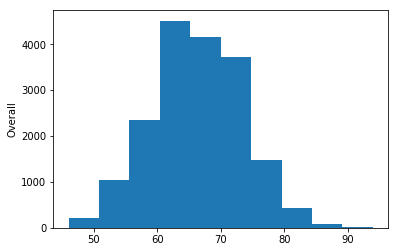

In [4]:
# Vemos la distribución de las calificaciones de los jugadores (overall)

overall_list = complete["overall"].tolist()
plt.hist(overall_list)
plt.ylabel('Overall');

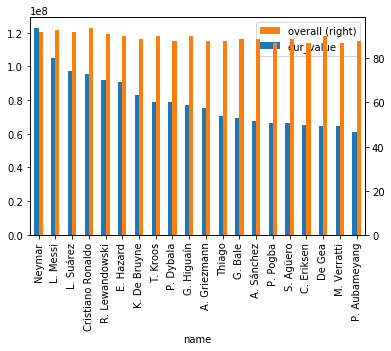

In [5]:
# Visualizamos los jugadores con precio de mercado más alto y su puntuación

top_eur_value = complete.sort_values(by = ["eur_value"], ascending = False)[["name", "eur_value", "overall"]].head(20)
top_eur_value.plot(x="name", y=["eur_value", "overall"], secondary_y = ["overall"], kind="bar", legend = "reverse")

In [6]:
# Analizamos el valor de mercado de los jugadores viendo su correlación con otras variables
# que sospechamos pueden influir en ella
# Descartamos los porteros del análisis para poder usar la variable skill_moves, baja para ellos

corr_df = complete.loc[complete["rs"].notnull(), ["eur_value", "age", "overall", "international_reputation", "skill_moves"]]
corr = corr_df.corr()
corr.style.background_gradient()

# Los resultados son interesantes: es más determinante la fama del jugador (international_reputation) 
# que su propia puntuación (overall)

,eur_value,age,overall,international_reputation,skill_moves
eur_value,1,0.0860653,0.63273,0.719494,0.263135
age,0.0860653,1,0.46233,0.238951,0.0207592
overall,0.63273,0.46233,1,0.529444,0.24346
international_reputation,0.719494,0.238951,0.529444,1,0.196015
skill_moves,0.263135,0.0207592,0.24346,0.196015,1
